
# 14 Decision Tree classifier


## Fraud_check data set

In [105]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing


In [106]:
df=pd.read_csv("Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


#### so drop undergrad, Marrital.Status urban columns


In [107]:
df=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)


In [108]:
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [109]:
df["TaxInc"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])


In [110]:
print(df)

     Taxable.Income  City.Population  Work.Experience  Undergrad_YES  \
0             68833            50047               10              0   
1             33700           134075               18              1   
2             36925           160205               30              0   
3             50190           193264               15              1   
4             81002            27533               28              0   
..              ...              ...              ...            ...   
595           76340            39492                7              1   
596           69967            55369                2              1   
597           47334           154058                0              0   
598           98592           180083               17              1   
599           96519           158137               16              0   

     Marital.Status_Married  Marital.Status_Single  Urban_YES TaxInc  
0                         0                      1          1   

In [111]:
# let asssume that the taxiable income<=30000 so it indicates the  risky=0,good=1 
df=pd.get_dummies(df,columns=["TaxInc"],drop_first=True)

In [112]:
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1


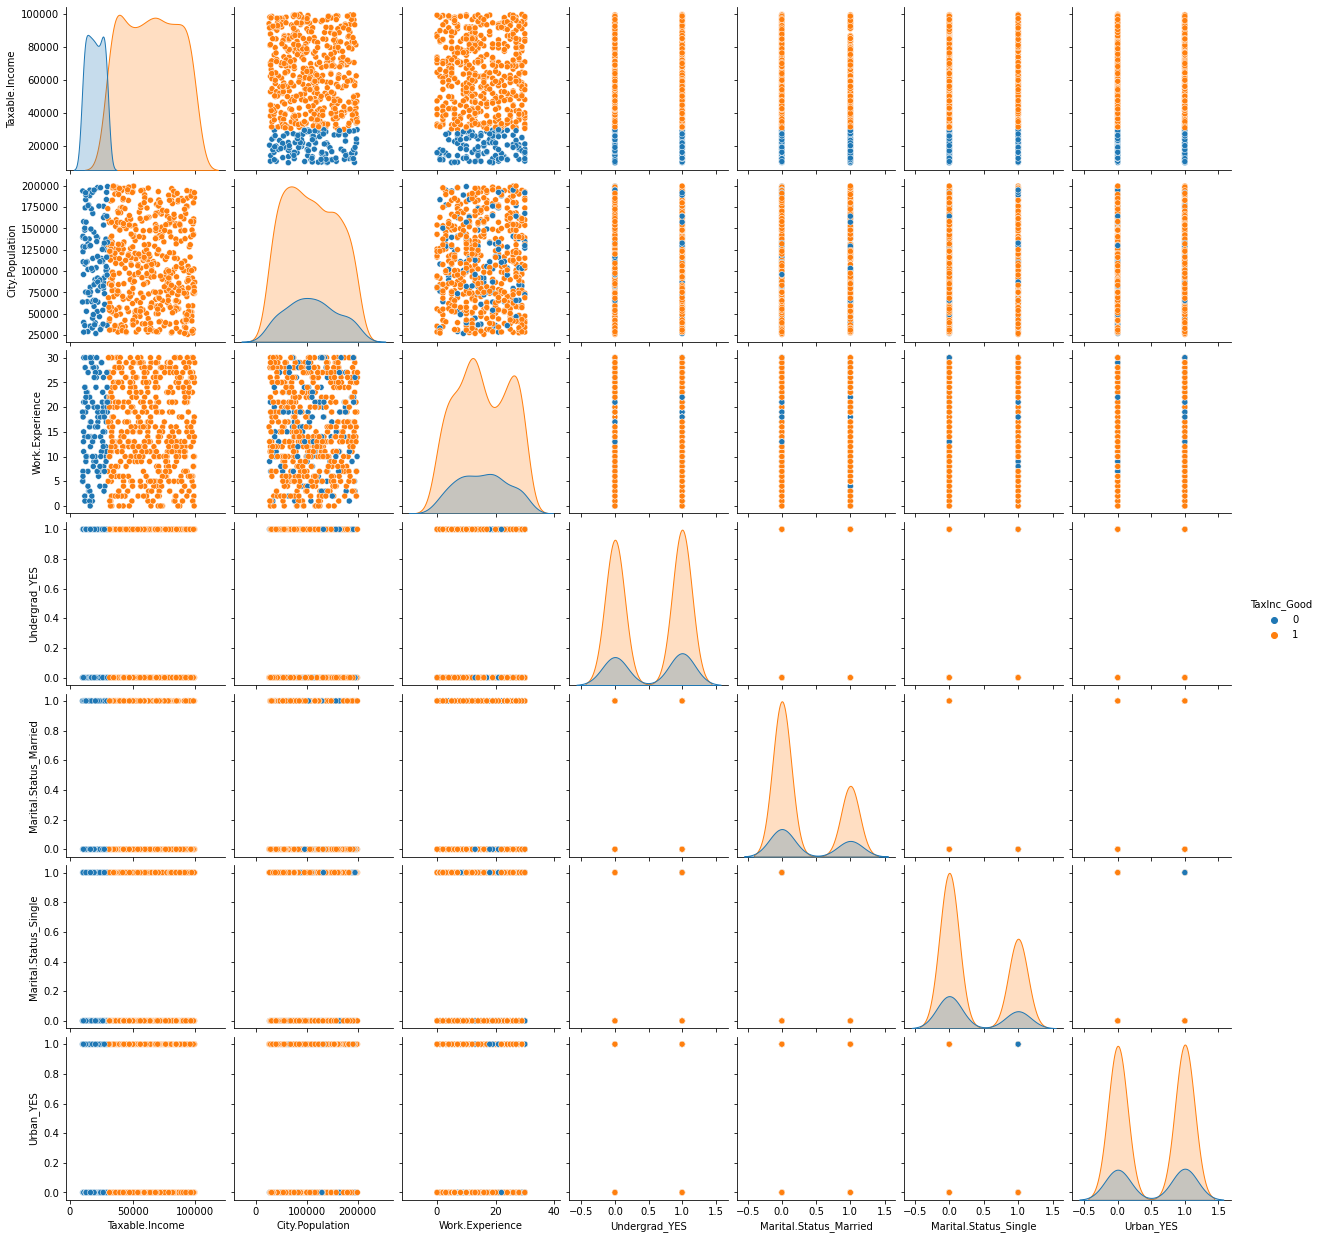

In [113]:

import seaborn as sns 
sns.pairplot(data=df,hue="TaxInc_Good",)

In [114]:
# normalise data
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return(x)

In [115]:
df_norm=norm_func(df.iloc[:,1:])
df_norm

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,0.139472,0.333333,0.0,0.0,1.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0


In [116]:
x=df_norm.drop(["TaxInc_Good"],axis=1)
y=df_norm["TaxInc_Good"]


In [117]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [118]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((480, 6), (120, 6), (480,), (120,))

In [119]:
#Choosing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [120]:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier(n_estimators=200)

In [121]:
df_norm["income"]="<=30000"
df_norm.loc[df["Taxable.Income"]>=30000,"income"]="Good"
df_norm.loc[df["Taxable.Income"]<=30000,"income"]="Risky"

In [122]:
df.drop(["Taxable.Income"],axis=1,inplace=True)

In [123]:
df.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population",
                   "Work.Experience":"experience","Urban":"urban"},inplace=True)


In [124]:
from sklearn import preprocessing 
le=preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = le.fit_transform(df[column_name])
    else:
        pass

In [125]:
features=df.iloc[:,0:5]
labels=df.iloc[:,5]

In [128]:
## Collecting the column names
colnames = list(df.columns)
predictors = colnames[0:5]
target = colnames[5]

In [129]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

In [130]:
##Model building
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [131]:
model.estimators_

[DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1943143183),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=651449984),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1728375700),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=901034567),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1953614345),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=884573720),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=822475118),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1375069244),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
          

In [132]:
model.classes_
model.n_features_

5

In [133]:
model.n_classes_

2

In [134]:
model.n_outputs_

1

In [135]:
model.oob_score_

0.5020833333333333

In [136]:
prediction=model.predict(x_train)
prediction

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,

In [137]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_train,prediction)
np.mean(prediction==y_train)

0.9979166666666667

In [138]:
import numpy as np 
np.mean(prediction==y_train)

0.9979166666666667

### Building Decision Tree classifier

In [139]:
model= DecisionTreeClassifier(criterion="entropy",max_depth=3)
model.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

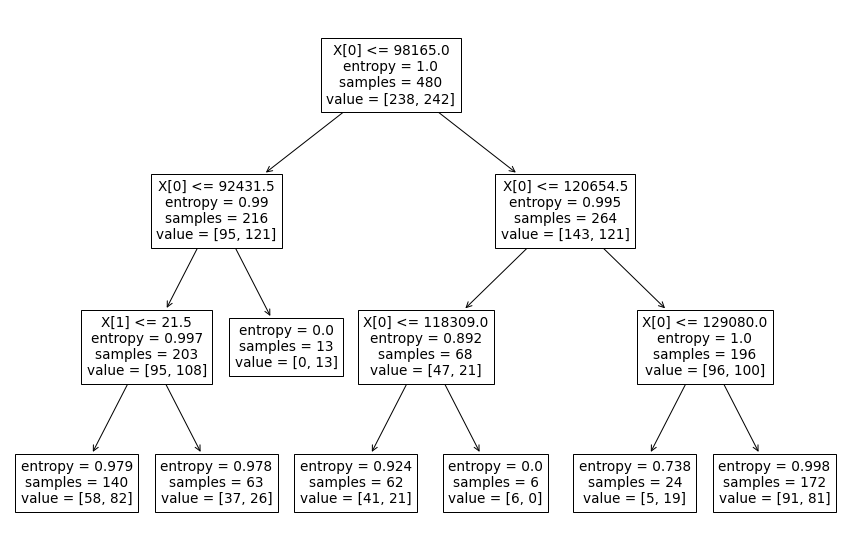

In [140]:
from sklearn import tree 
plt.figure(figsize=(15,10))
tree.plot_tree(model)
plt.show()

In [141]:
colnames = list(df.columns)
colnames

['population',
 'experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

In [142]:
fn=['City.Population','Work.Experience','Undergrad_YES','Marital.Status_Married',
    'Marital.Status_Single', 'Urban_YES','TaxInc_Good']
cn=["1","0"]

<Figure size 1080x720 with 0 Axes>

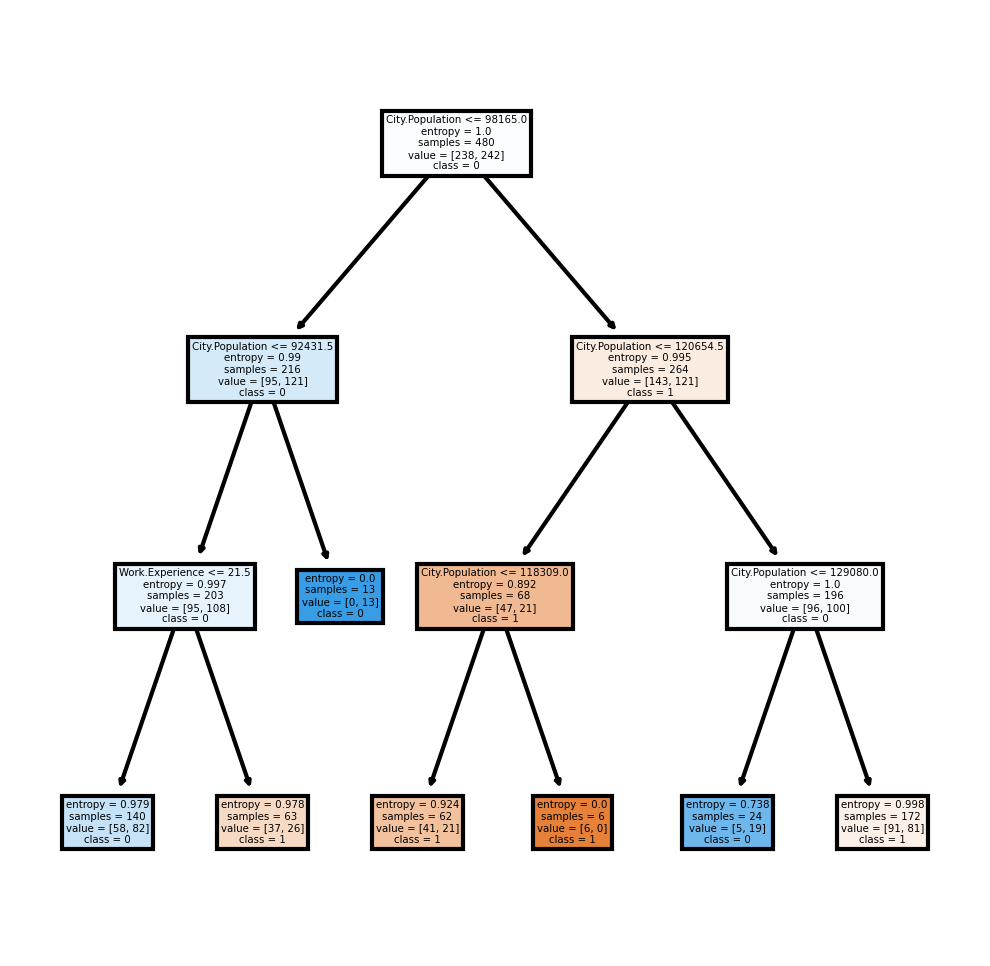

In [143]:
plt.figure(figsize=(15,10))
axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,feature_names = fn,  class_names=cn,filled = True);

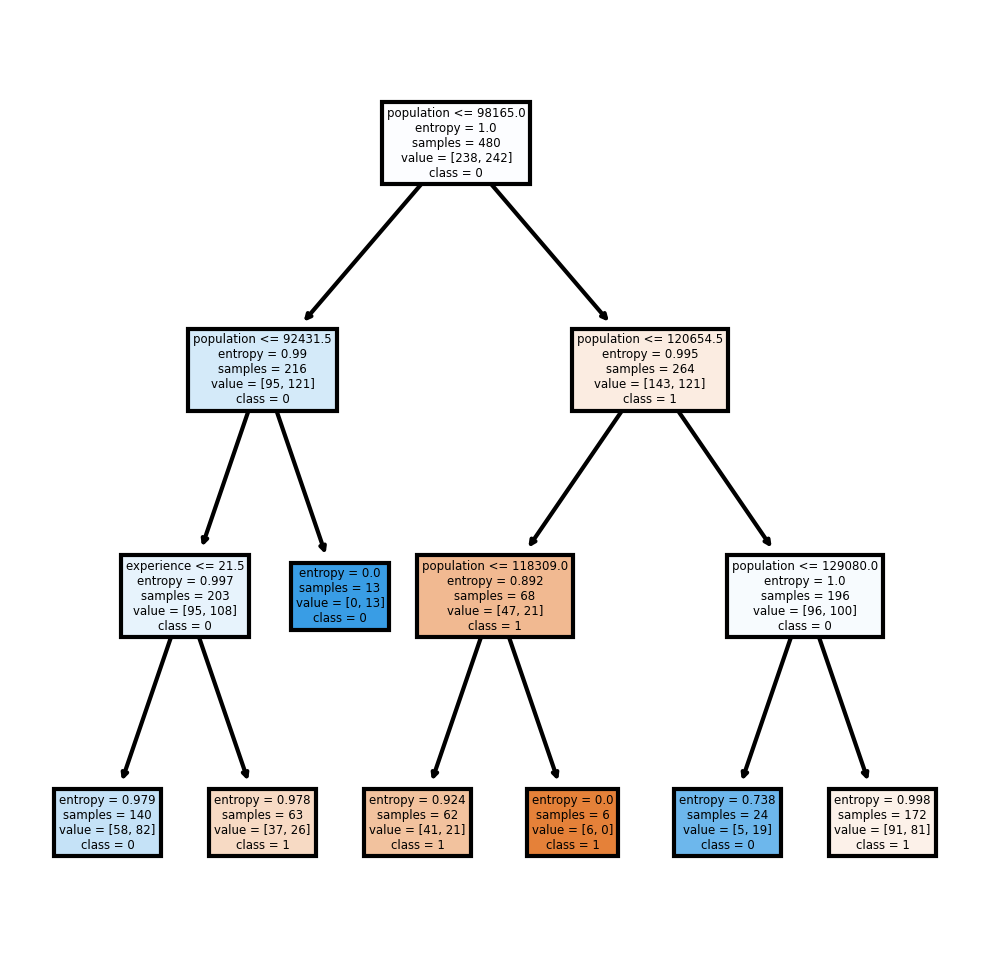

In [144]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [145]:
preds=model.predict(x_test)
preds

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

In [103]:
pd.Series(preds).value_counts()

2    50
3     9
1     1
dtype: int64

In [104]:
pd.crosstab(y_test,preds)

col_0,1,2,3
sales_status,,,
1,1,9,0
2,0,28,1
3,0,13,8


## Building Decision Tree Classifier using Gini Criterion

In [41]:
from sklearn.tree import  DecisionTreeClassifier
model_gini= DecisionTreeClassifier(criterion="gini",max_depth=3)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [42]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.55

#### Decision Tree Regression Example

In [43]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [44]:
array=df.values
x=array[:,0:3]
y=array[:,3]

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

-1.0423028435355093

#  Company Data.csv

In [46]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [47]:
import warnings
warnings.filterwarnings("ignore")

In [48]:
sales_data=pd.read_csv("Company_Data.csv")
sales_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [49]:
sales_data[sales_data["Sales"]>=11].head(20)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
11,11.96,117,94,4,503,94,Good,50,13,Yes,Yes
14,11.17,107,117,11,148,118,Good,52,18,Yes,Yes
17,12.29,147,74,13,251,131,Good,52,10,Yes,Yes
18,13.91,110,110,0,408,68,Good,46,17,No,Yes
21,12.13,134,29,12,239,109,Good,62,18,No,Yes
25,14.90,139,32,0,176,82,Good,54,11,No,No
30,13.55,125,94,0,447,89,Good,30,12,Yes,No
35,11.07,131,84,11,29,96,Medium,44,17,No,Yes


In [50]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [51]:
sales_data.describe()


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [52]:
sales_data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

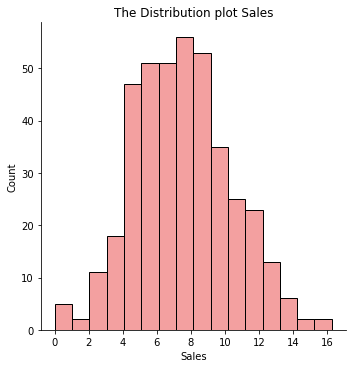

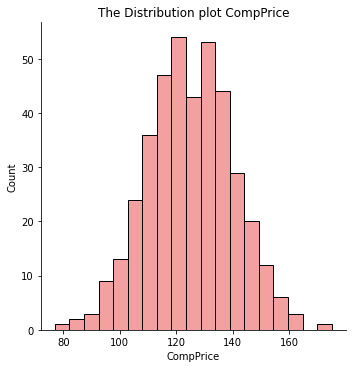

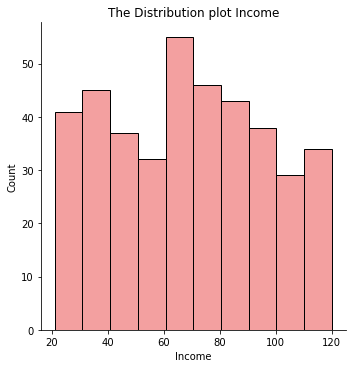

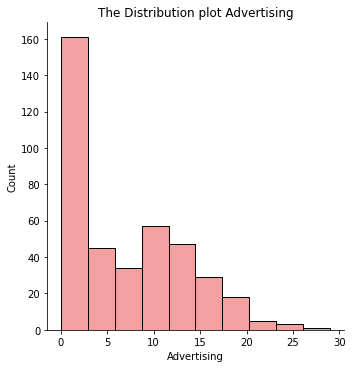

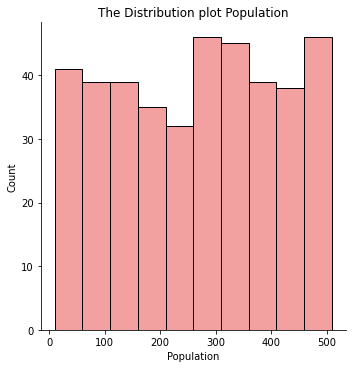

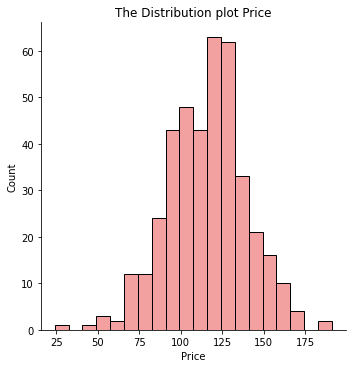

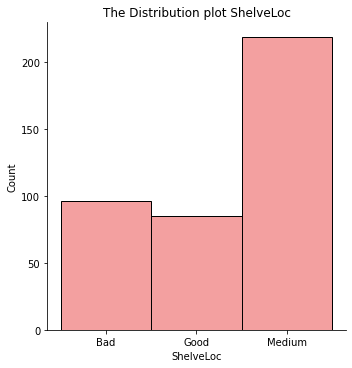

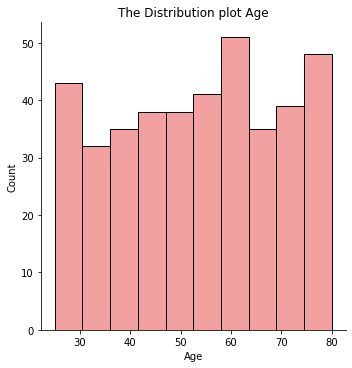

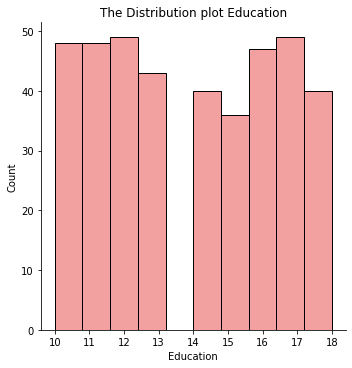

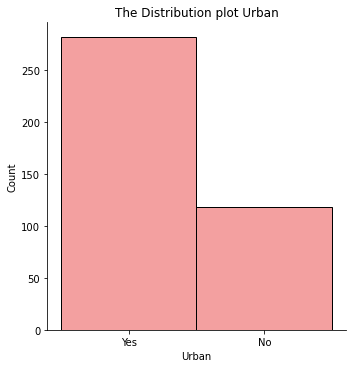

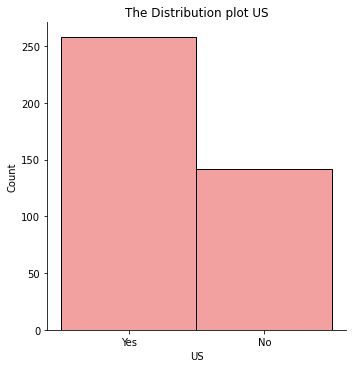

In [53]:
for i in sales_data.columns:
    sns.displot(x=i, data=sales_data , color ="#F08080")
    plt.title("The Distribution plot {}".format(i))

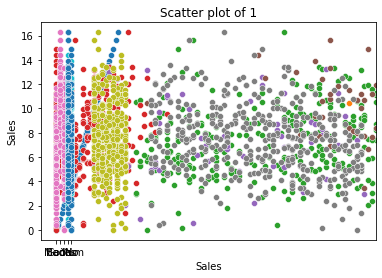

In [54]:
for i in sales_data.columns:
    sns.scatterplot(x=i,y="Sales",data=sales_data)
    plt.title("Scatter plot of {}".format(1))

Text(0.5, 1.0, 'Age vs Sales')

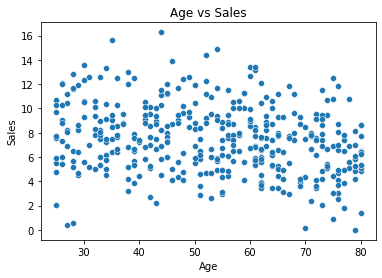

In [55]:
sns.scatterplot(x="Age",y="Sales",data=sales_data)
plt.xlabel("Age")
plt.title("Age vs Sales")

Text(0.5, 1.0, 'Advertising vs Sales')

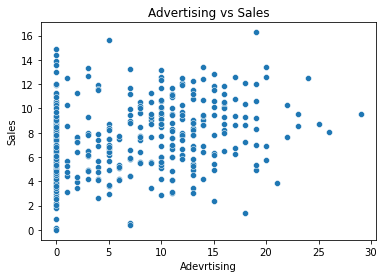

In [56]:
sns.scatterplot(x="Advertising",y="Sales",data=sales_data)
plt.xlabel("Adevrtising")
plt.title("Advertising vs Sales")

In [180]:
def get_categorical_data(x):
    sales_status=[]
    for i in x:
        if i>=11:
            sales_status.append("1")
        elif i>=6:
            sales_status.append("2")
        elif i<6:
            sales_status.append("3")
    return sales_status

In [181]:
x=sales_data["Sales"]
sales_data["sales_status"]=get_categorical_data(x)
sales_data.sales_status.value_counts()

2    221
3    130
1     49
Name: sales_status, dtype: int64

In [182]:
sales_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_status
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,2
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,2
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,2
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,1
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,2
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,2
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,3


In [183]:
X=sales_data.iloc[:,1:11]
Y=sales_data.iloc[:,11]

In [184]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes
4,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes
396,139,23,3,37,120,Medium,55,11,No,Yes
397,162,26,12,368,159,Medium,40,18,Yes,Yes
398,100,79,7,284,95,Bad,50,12,Yes,Yes


In [185]:
Y

0      2
1      1
2      2
3      2
4      3
      ..
395    1
396    2
397    2
398    3
399    2
Name: sales_status, Length: 400, dtype: object

In [187]:
# Label Encoding  for ShelveLoc ,Urban ,US
le=LabelEncoder()
X["ShelveLoc"]=le.fit_transform(X["ShelveLoc"])
X["Urban"]=le.fit_transform(X["Urban"])
X["US"]=le.fit_transform(X["US"])

In [188]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [189]:
# splituing the data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=44)

###### Buiding the tree model with  entropy 

In [190]:
model =DecisionTreeClassifier(criterion="entropy",max_depth=10)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

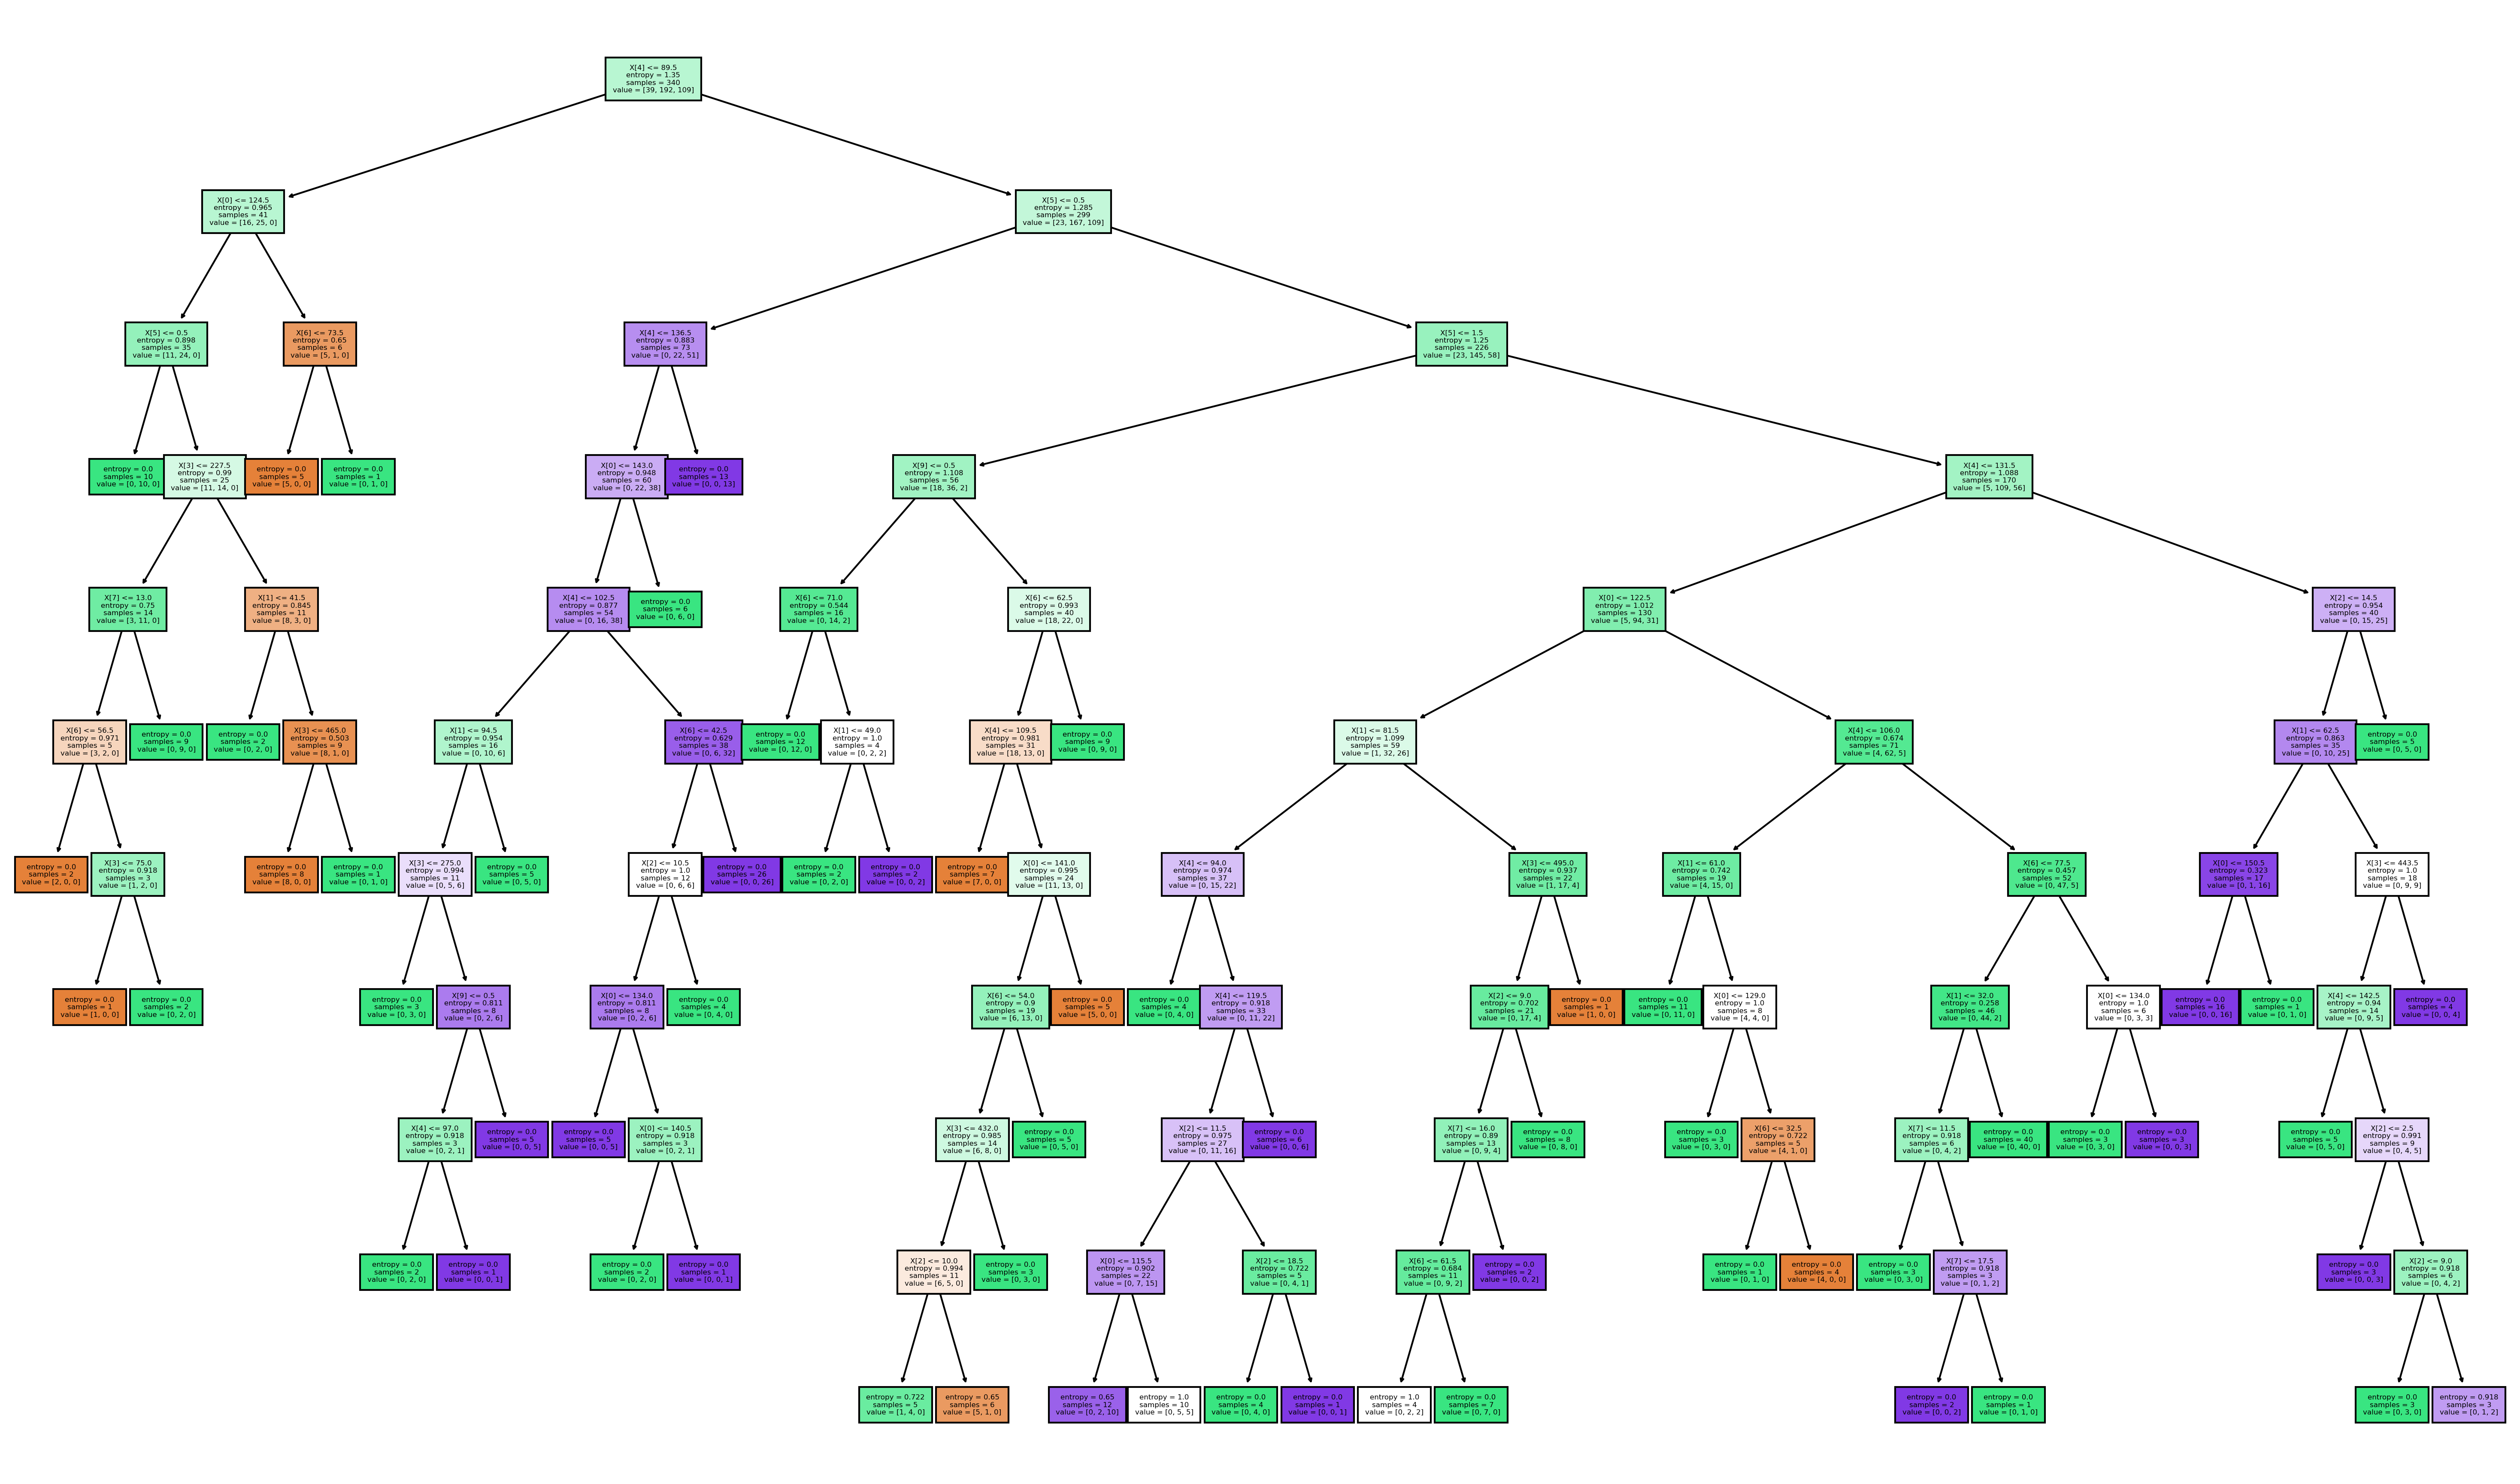

In [191]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(25,15),dpi=300)
plt.title("Tree Visualization")
tree.plot_tree(model,filled=True,fontsize=4)
plt.show()

In [192]:
preds=model.predict(x_test)
preds

array(['2', '2', '2', '2', '2', '3', '3', '2', '2', '2', '3', '3', '1',
       '3', '2', '2', '2', '2', '2', '1', '2', '3', '2', '2', '3', '2',
       '2', '3', '1', '2', '2', '2', '1', '2', '2', '2', '2', '3', '3',
       '3', '2', '3', '2', '2', '2', '2', '2', '1', '3', '2', '1', '3',
       '3', '3', '2', '3', '1', '2', '2', '3'], dtype=object)

In [193]:
pd.Series(preds).value_counts()

2    35
3    18
1     7
dtype: int64

In [194]:
pd.crosstab(y_test,preds)

col_0,1,2,3
sales_status,,,
1,3,7,0
2,4,24,1
3,0,4,17


In [195]:

print("The test data accuracy is:"+str(np.mean(preds==y_test)))

The test data accuracy is:0.7333333333333333


In [196]:
pred1=model.predict(x_train)

In [197]:
pd.Series(pred1).value_counts()

2    196
3    105
1     39
dtype: int64

In [198]:
pd.crosstab(pred1,y_train)

sales_status,1,2,3
row_0,,,
1,38,1,0
2,1,188,7
3,0,3,102


In [199]:

print("The training data accuracy is :" + str(np.mean(pred1==y_train)))

The training data accuracy is :0.9647058823529412


# Building a model with Gini Index

In [200]:
model_gini=DecisionTreeClassifier(criterion="gini",max_depth=10)

In [201]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10)

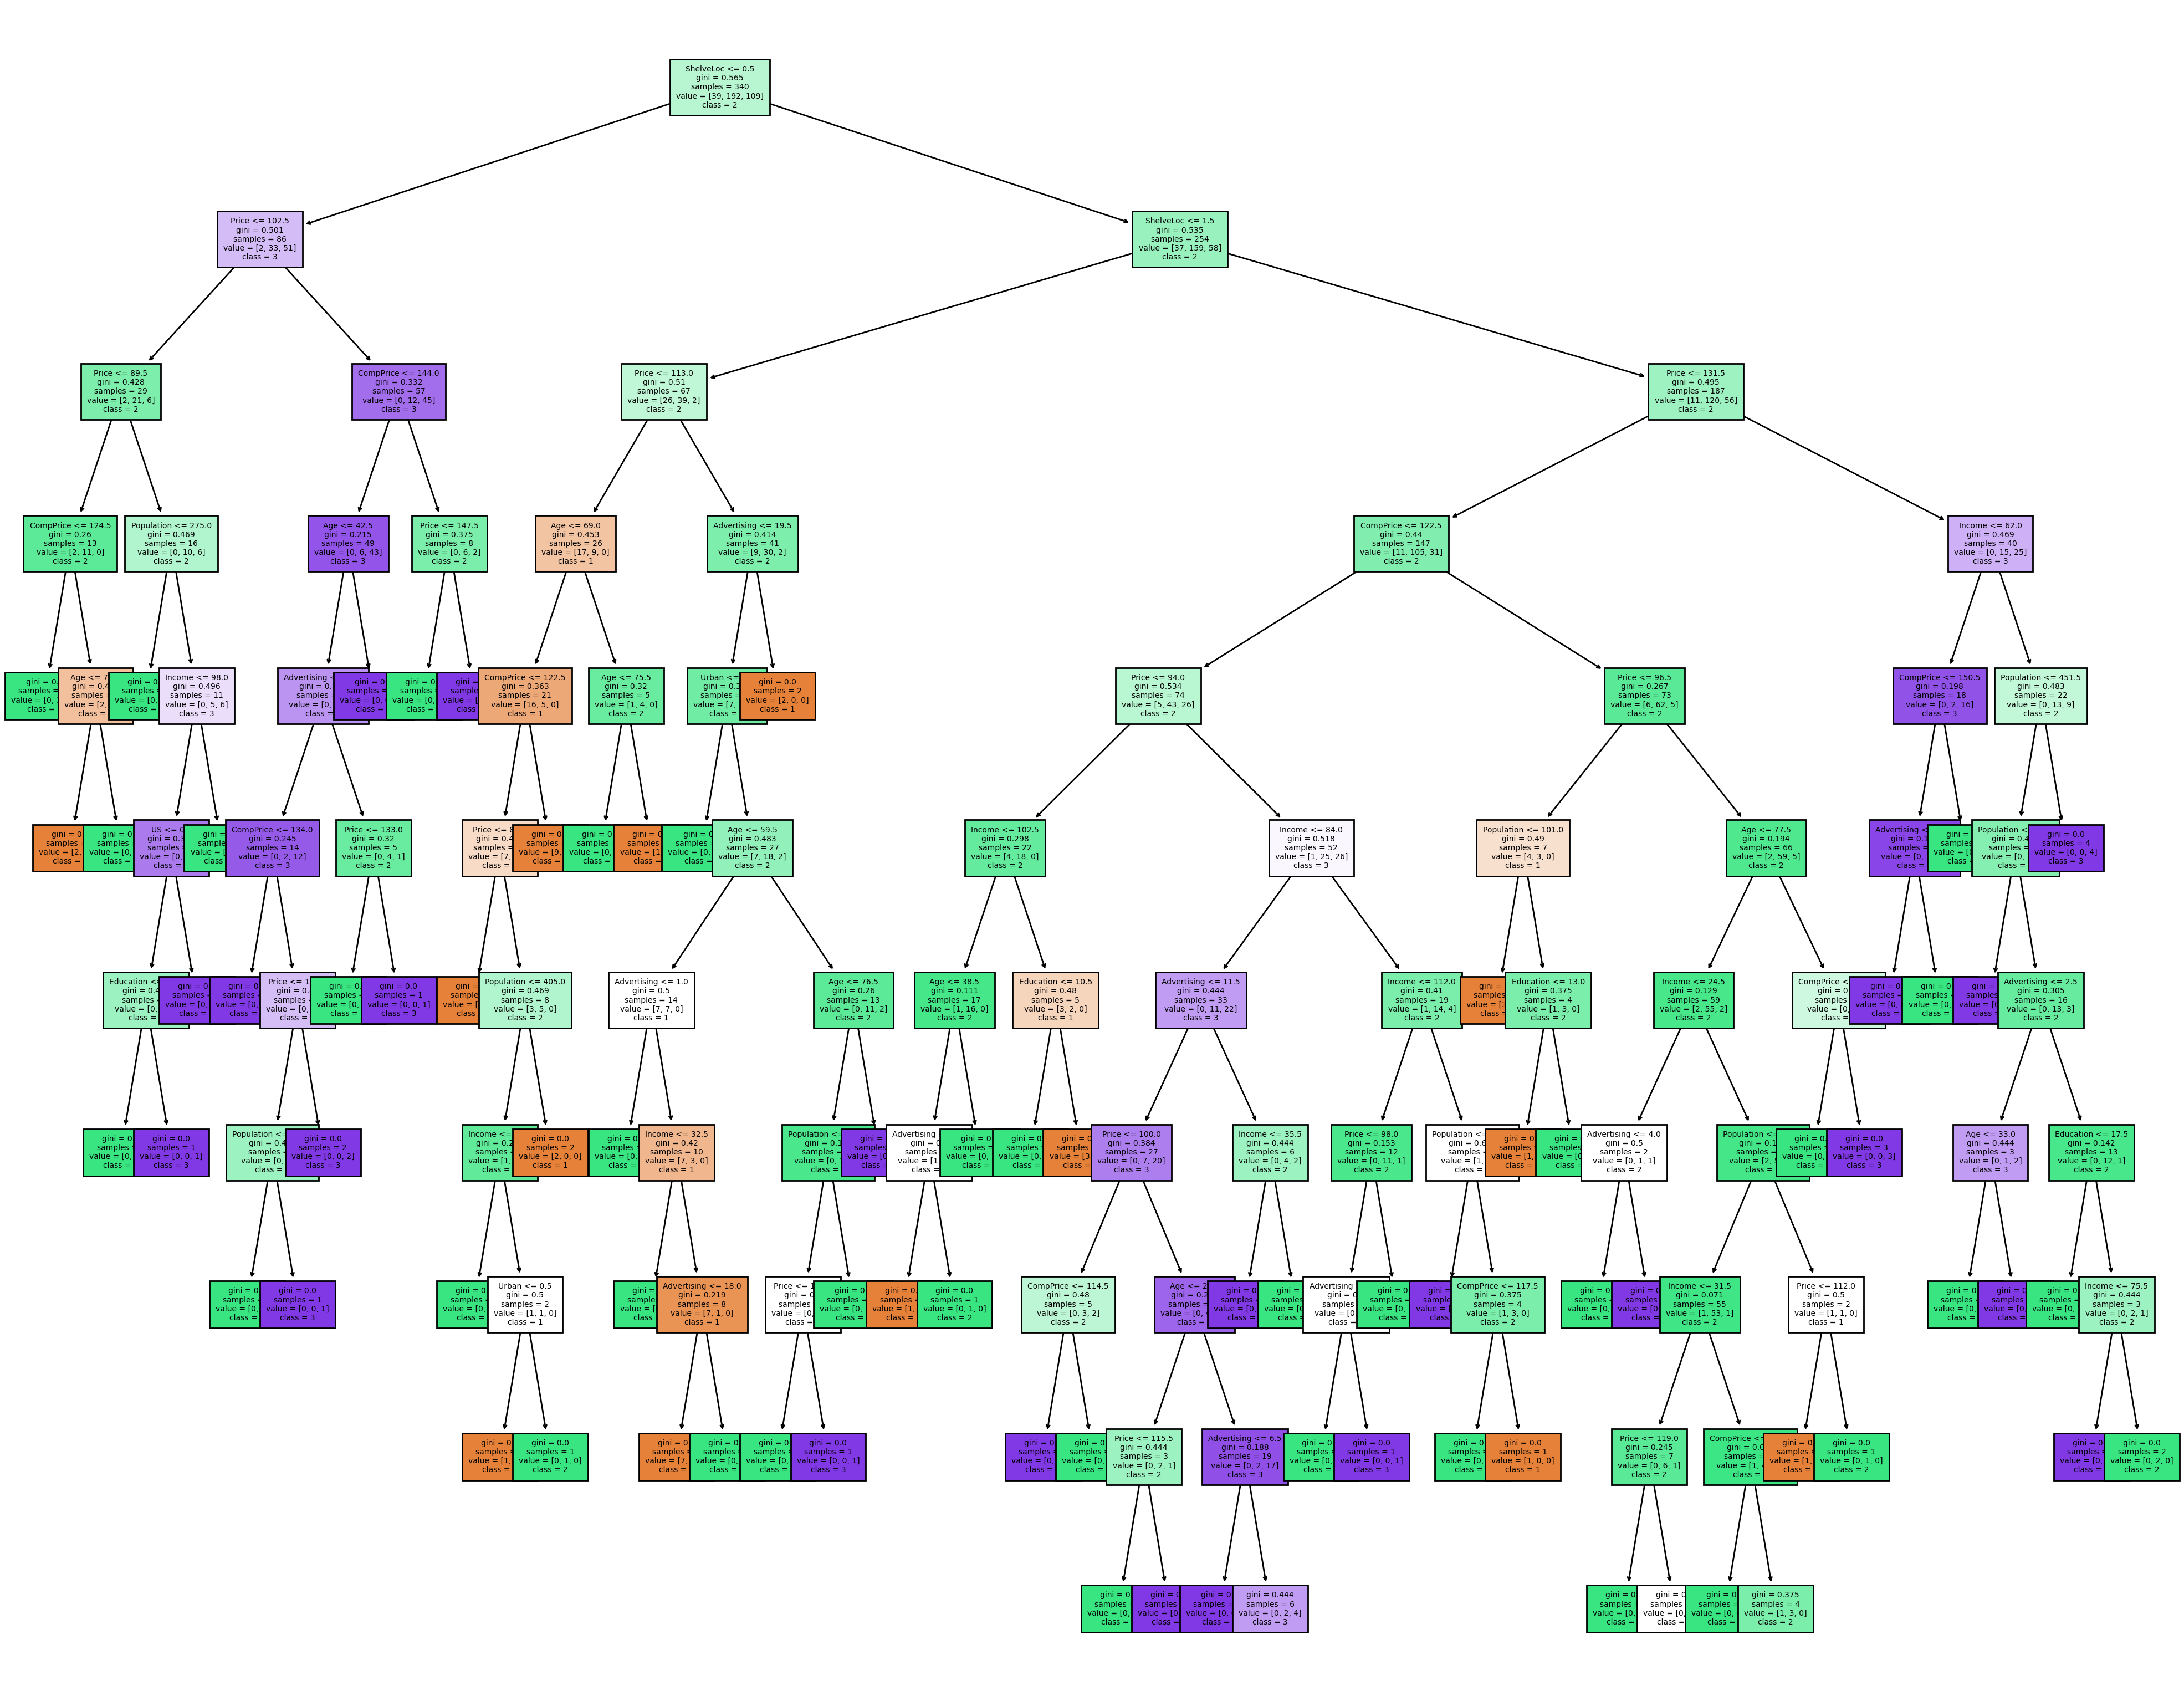

In [202]:
fig,axes = plt.subplots(nrows = 1,ncols = 1,figsize = (25,20), dpi=200)
features=x_train.columns
tree.plot_tree(model_gini,filled=True,fontsize=5,feature_names=features,class_names=['1','2','3']);

In [203]:
pred_on_train_data=model_gini.predict(x_train)

In [204]:
pd.Series(pred_on_train_data).value_counts()

2    192
3    110
1     38
dtype: int64

In [205]:
pd.crosstab(pred_on_train_data,y_train)

sales_status,1,2,3
row_0,,,
1,38,0,0
2,1,190,1
3,0,2,108


In [206]:
print("The training data accuracy is :"+str(np.mean(pred_on_train_data==y_train)))

The training data accuracy is :0.9882352941176471


In [207]:
pred_on_test_data= model_gini.predict(x_test)
pd.Series(pred_on_test_data).value_counts()

2    34
3    19
1     7
dtype: int64

In [208]:
pd.crosstab(pred_on_test_data,y_test)

sales_status,1,2,3
row_0,,,
1,4,3,0
2,6,24,4
3,0,2,17


In [209]:
print("The test data accuracy is :" + str(np.mean(pred_on_test_data==y_test)))

The test data accuracy is :0.75
